In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,Dropout

In [18]:
df=pd.read_csv("GOOG.csv",date_parser=True)

C:\Users\ayush\AppData\Local\Temp\ipykernel_12164\647692590.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df=pd.read_csv("GOOG.csv",date_parser=True)


In [19]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [20]:
df.head

<bound method NDFrame.head of             Date        Open        High         Low       Close   Adj Close  \
0     2004-08-19    2.490664    2.591785    2.390042    2.499133    2.499133   
1     2004-08-20    2.515820    2.716817    2.503118    2.697639    2.697639   
2     2004-08-23    2.758411    2.826406    2.716070    2.724787    2.724787   
3     2004-08-24    2.770615    2.779581    2.579581    2.611960    2.611960   
4     2004-08-25    2.614201    2.689918    2.587302    2.640104    2.640104   
...          ...         ...         ...         ...         ...         ...   
4853  2023-11-29  138.985001  139.669998  136.294998  136.399994  136.399994   
4854  2023-11-30  136.399994  136.960007  132.789993  133.919998  133.919998   
4855  2023-12-01  133.320007  133.500000  132.151993  133.320007  133.320007   
4856  2023-12-04  131.294006  131.449997  129.399994  130.630005  130.630005   
4857  2023-12-05  130.369995  133.539993  129.729996  132.389999  132.389999   

         

In [21]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
data=df[['Close']]

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)

C:\Users\ayush\AppData\Local\Temp\ipykernel_12164\3157814214.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


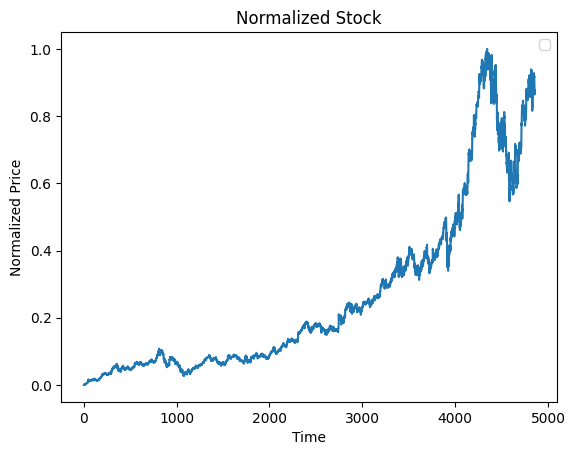

In [23]:
import matplotlib.pyplot as plt
plt.plot(scaled_data)
plt.xlabel("Time")
plt.ylabel("Normalized Price")
plt.title("Normalized Stock")
plt.legend()
plt.show()

In [24]:
def create_sequences(data,time_step=30):
    X,y=[],[]
    for i in range(time_step,len(data)):
        X.append(data[i-time_step:i,0])
        y.append(data[i,0])

    return np.array(X),np.array(y)

In [25]:
time_step=60
X,y=create_sequences(scaled_data,time_step)
X=X.reshape(X.shape[0],X.shape[1],1)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

In [41]:
model=Sequential()

# model.add(SimpleRNN(units=80,activation='relu', return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(SimpleRNN(units=40 ,activation='relu', return_sequences=False))
# model.add(SimpleRNN(units=40 ,activation='relu', return_sequences=True))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [45]:
history=model.fit(x_train,y_train,epochs=4,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/4
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.4205e-05 - val_loss: 5.9887e-04
Epoch 2/4
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 2.6779e-05 - val_loss: 6.0301e-04
Epoch 3/4
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 2.6622e-05 - val_loss: 6.3608e-04
Epoch 4/4
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2961e-05 - val_loss: 7.0303e-04


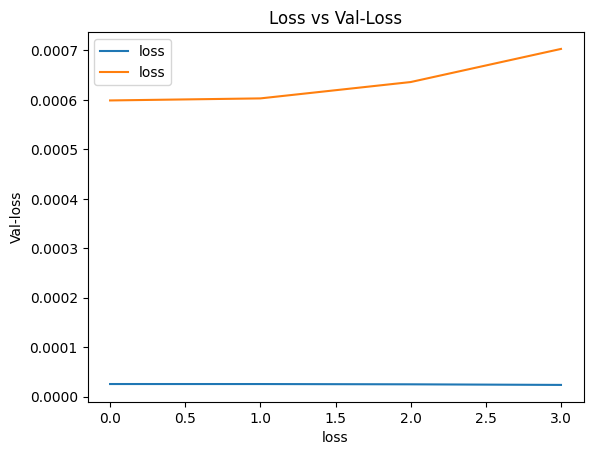

In [48]:
plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['val_loss'],label="loss")
plt.xlabel("loss")
plt.ylabel("Val-loss")
plt.title("Loss vs Val-Loss")
plt.legend()
plt.show()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


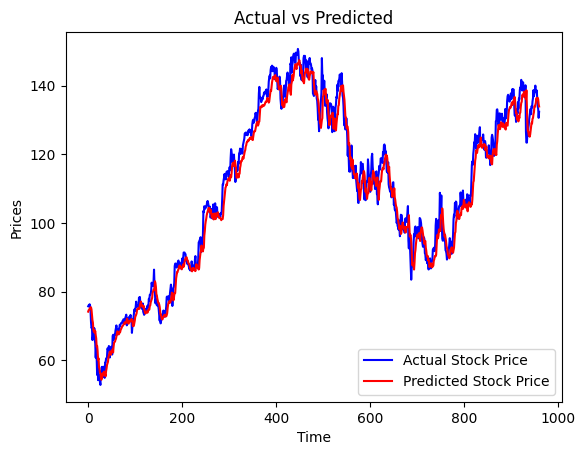

In [43]:
prediction=model.predict(x_test)
prediction=scaler.inverse_transform(prediction)

y_actual=scaler.inverse_transform(y_test.reshape(-1,1))

plt.plot(y_actual,color="blue",label="Actual Stock Price")
plt.plot(prediction,color="red",label="Predicted Stock Price")
plt.xlabel("Time")
plt.ylabel("Prices")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()